<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Load-composite-data" data-toc-modified-id="Load-composite-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load composite data</a></span><ul class="toc-item"><li><span><a href="#OGWD" data-toc-modified-id="OGWD-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>OGWD</a></span></li><li><span><a href="#Zonal-wind" data-toc-modified-id="Zonal-wind-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Zonal wind</a></span></li></ul></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualization</a></span></li></ul></div>

# Import libraries

In [19]:
import xarray as xr
import matplotlib.pyplot as plt
import shapely.geometry as sgeom
import matplotlib.ticker as ticker
import numpy as np
import matplotlib as mpl
import glob

In [24]:
%reload_ext watermark
%watermark --iversions -v -m -p scipy

matplotlib 3.1.2
numpy      1.17.3
xarray     0.14.1
CPython 3.6.9
IPython 7.1.1

scipy 1.2.1

compiler   : GCC 8.4.0
system     : Linux
release    : 4.15.0-96-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


# Load composite data

In [3]:
DJF_bool = '_DJFonly'
root_path = '/mnt/4data/CMAM/0A.daily/'
inpath = f'{root_path}composites_woSSW{DJF_bool}/'

## OGWD

In [13]:
timescale = 20#30
var = 'accelogw'

e_type_ls = ['himalayas', 'eastasia', 'westamer']
if var == 'vmro3':
    what_ls = ['percentages', 'absolute']
else:
    what_ls = ['anomalies']
    
da_ls2 = []
for what in what_ls:
    da_ls = []
    #print(what)
    for i,e_type in enumerate(e_type_ls):
        #print(e_type)
        infile = f'{inpath}{var}_{what}_comp_{e_type}_{timescale}days.nc'
        print(infile)
        da = xr.open_dataarray(infile)
        if var != 'lwa':
            da['plev'] = da.plev/100.
        else:
            da = da.rename({'z': 'plev'})

        da_ls.append(da)
    da_conc = xr.concat(da_ls, dim = 'e_type')
    da_conc['e_type'] = e_type_ls
    da_ls2.append(da_conc)
        
da_all = xr.concat(da_ls2, dim = 'what')
da_all['what'] = what_ls

/mnt/4data/CMAM/0A.daily/composites_woSSW_DJFonly/accelogw_anomalies_comp_himalayas_20days.nc
/mnt/4data/CMAM/0A.daily/composites_woSSW_DJFonly/accelogw_anomalies_comp_eastasia_20days.nc
/mnt/4data/CMAM/0A.daily/composites_woSSW_DJFonly/accelogw_anomalies_comp_westamer_20days.nc


In [6]:
da_pv_ls = []
for e_type in e_type_ls:
    outfile_name = f'{inpath}{var}_pvalues_from10000_comp_{e_type}_{timescale}days_latlonbox.nc'
    print(outfile_name)
    da_pv = xr.open_dataarray(outfile_name)
    da_pv['plev'] = da_pv.plev/100.
    da_pv_ls.append(da_pv)

da_pv_all = xr.concat(da_pv_ls, dim = 'e_type')
da_pv_all['e_type'] = e_type_ls 
da_pv_all


/mnt/4data/CMAM/0A.daily/composites_woSSW_DJFonly/accelogw_pvalues_from10000_comp_himalayas_20days_latlonbox.nc
/mnt/4data/CMAM/0A.daily/composites_woSSW_DJFonly/accelogw_pvalues_from10000_comp_eastasia_20days_latlonbox.nc
/mnt/4data/CMAM/0A.daily/composites_woSSW_DJFonly/accelogw_pvalues_from10000_comp_westamer_20days_latlonbox.nc


<xarray.DataArray 'accelogw' (e_type: 3, plev: 63, lag: 21)>
array([[[1.00536514e+03, 1.63166039e+03, 2.09182157e+03, ...,
         9.65049798e+02, 4.27216586e+02, 3.83559362e+03],
        [3.94687757e+01, 3.28071155e+01, 5.07425397e+01, ...,
         4.41497804e+01, 2.62292508e+01, 2.17519233e+01],
        [2.59495246e+01, 2.20558845e+01, 2.12246236e+01, ...,
         1.55414395e+01, 9.01952778e+00, 1.06568064e+01],
        ...,
        [3.09610759e-02, 1.36634648e-02, 8.53573165e-01, ...,
         5.40108109e-03, 4.36799159e-01, 3.63706052e-01],
        [2.94055507e-02, 4.32948303e-02, 8.90788459e-01, ...,
         5.55236849e-02, 1.12340229e+00, 1.05681025e+00],
        [4.47228454e-02, 1.64284232e-02, 2.10798620e-01, ...,
         1.15581557e-01, 7.48982408e-01, 8.28933056e-01]],

       [[3.10296029e+01, 4.49916825e+01, 5.47648903e+01, ...,
         5.22703506e+01, 5.14767699e+01, 5.31249170e+01],
        [8.04491245e+00, 7.23589073e+00, 5.72493782e+00, ...,
         7.01454485e+00, 3.63542839e+00, 7.11423951e+00],
        [6.85534403e+00, 5.83226917e+00, 7.91906720e+00, ...,
         2.03302226e+00, 2.58762765e+00, 2.85657051e+00],
        ...,
        [6.90785353e-01, 5.76530467e-01, 6.88236853e-01, ...,
         6.98066911e-02, 7.04740282e-02, 5.53027178e-01],
        [5.83725832e-01, 5.70446777e-01, 5.68377541e-01, ...,
         9.42268718e-02, 7.47944653e-02, 2.60994231e-01],
        [3.69773777e-01, 3.72662195e-01, 3.47255604e-01, ...,
         6.44000503e-02, 3.65290949e-02, 1.15612072e-01]],

       [[3.99841600e+02, 4.01144789e+02, 4.09068409e+02, ...,
         2.17841033e+02, 2.61119445e+02, 3.34953282e+02],
        [7.16373948e+00, 7.77737527e+00, 7.45291573e+00, ...,
         7.77690449e+00, 7.61141052e+00, 7.59608033e+00],
        [1.91012952e+00, 9.88763356e-01, 1.04281737e+00, ...,
         2.69426148e+00, 1.61432550e+00, 7.24264968e-01],
        ...,
        [3.61177258e-01, 3.62602218e-02, 1.07880491e-01, ...,
         9.71491655e-02, 1.86386926e-01, 7.35898248e-02],
        [6.16309412e-01, 5.11061512e-02, 4.79337030e-02, ...,
         2.71744689e-01, 1.85240116e-01, 1.01791803e-01],
        [4.36945851e-01, 8.46669327e-02, 6.57067110e-02, ...,
         2.55610804e-01, 1.47505723e-01, 1.07494558e-01]]])
Coordinates:
  * lag      (lag) int64 -10 -9 -8 -7 -6 -5 -4 -3 -2 -1 0 1 2 3 4 5 6 7 8 9 10
  * plev     (plev) float64 1e+03 925.0 850.0 800.0 ... 0.0015 0.001 0.0007
  * e_type   (e_type) <U9 'himalayas' 'eastasia' 'westamer'

## Zonal wind

In [9]:
var = 'ua'#
what_ls = ['anomalies']

da_ls2 = []
for what in what_ls:
    da_ls = []
    #print(what)
    for i,e_type in enumerate(e_type_ls):
        infile = f'{inpath}{var}_{what}_comp_{e_type}_{timescale}days.nc'
        print(infile)
        da = xr.open_dataarray(infile)
        if var != 'lwa':
            da['plev'] = da.plev/100.
        else:
            da = da.rename({'z': 'plev'})

        da_ls.append(da)
    da_conc = xr.concat(da_ls, dim = 'e_type')
    da_conc['e_type'] = e_type_ls
    da_ls2.append(da_conc)
        
da_all_ua = xr.concat(da_ls2, dim = 'what')
da_all_ua['what'] = what_ls

/mnt/4data/CMAM/0A.daily/composites_woSSW_DJFonly/ua_anomalies_comp_himalayas_20days.nc
/mnt/4data/CMAM/0A.daily/composites_woSSW_DJFonly/ua_anomalies_comp_eastasia_20days.nc
/mnt/4data/CMAM/0A.daily/composites_woSSW_DJFonly/ua_anomalies_comp_westamer_20days.nc


# Visualization

0 himalayas
1 eastasia
2 westamer


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:92: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


accelogw_anomalies_all_20days_profiles_alllags_wsignificance_with-zonalwind.pdf


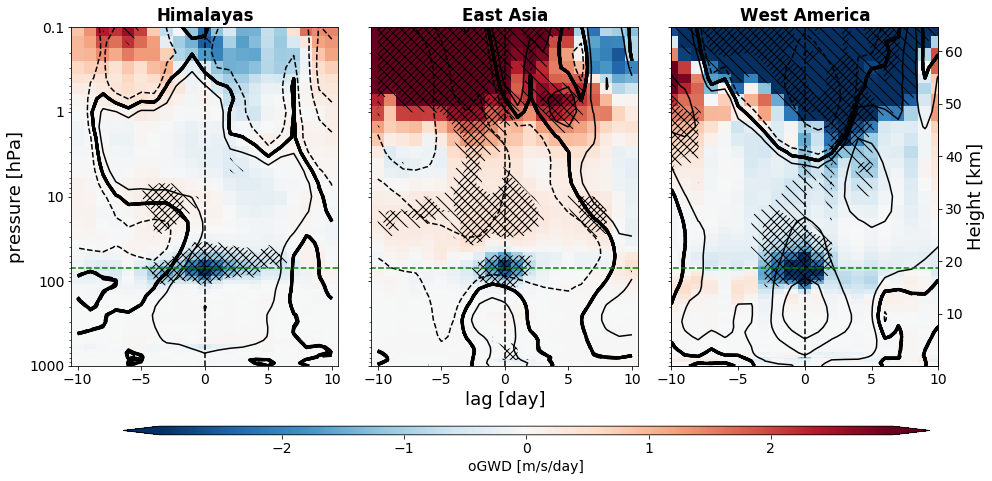

In [16]:
n_col = 3
mpl.rcParams.update({'font.size': 14})
titles = ['Himalayas', 'East Asia', 'West America']
fig, axes = plt.subplots(1, n_col, figsize=(14,6), sharey=True)
i=0

for j,e_type in enumerate(e_type_ls):
    print(i,e_type)
    ax = axes.flatten()[i]
      
    if e_type == 'himalayas':
        box = sgeom.box(minx=70, maxx=105, miny=20, maxy=42)
    elif e_type == 'eastasia':
        box = sgeom.box(minx=110, maxx=145, miny=27.5, maxy=52)
    elif e_type == 'westamer':
        box = sgeom.box(minx=-125, maxx=-102.5, miny=27.5, maxy=52)
    
    box_lats = np.array(box.bounds)[1::2]
    box_lons = np.array(box.bounds)[::2]
    box_lons[box_lons < 0] += 360
        
    sel_dict = dict(lat = slice(box_lats[0], box_lats[1]), \
                    lon = slice(box_lons[0], box_lons[1]), \
                    e_type = e_type)
    #print(sel_dict)

    temp = da_all.sel(**sel_dict).sel(what = 'anomalies').mean(['lat', 'lon'])
    temp_ua = da_all_ua.sel(**sel_dict).sel(what = 'anomalies').mean(['lat', 'lon'])
    #print(temp)
    add_colorbar = False
    
    p = (temp*24*3600).T.plot(ax=ax, vmax = 3, extend = 'both', add_colorbar=add_colorbar)
    temp_ua.T.plot.contour(ax=ax, levels = [-8,-5,-1,1,5,8], \
                   yincrease = False, colors=('k'), add_colorbar=add_colorbar)
    temp_ua.T.plot.contour(ax=ax, vmax = 0.01, vmin =-0.01, linewidths = 3, \
                   yincrease = False, colors=('k'), add_colorbar=add_colorbar)

        
      #p-values hatching
    plot_kwargs2 = dict(levels = [0,0.05], hatches=['\\\\',None], \
                                    colors='none', add_colorbar=False, \
                                     yincrease = False)
    da_pv_all.sel(e_type = e_type).plot.contourf(ax = ax, **plot_kwargs2)
    plot_kwargs2['levels'] = [0,0.01]
    plot_kwargs2['hatches'] = ['////',None]
    da_pv_all.sel(e_type = e_type).plot.contourf(ax = ax, **plot_kwargs2)

    if i == 0:
        #ax.legend(e_type_ls)
        ax.set_ylabel('pressure [hPa]', fontdict=dict(fontsize = 18))
        ax.set_yticklabels(['1000','100','10','1','0.1']) 
    else:
        ax.set_ylabel('')
        ax.set_yticklabels([])
    

    if i==1:
        ax.set_xlabel('lag [day]', fontdict=dict(fontsize = 18))
    else:
        ax.set_xlabel('')
        
    

    ax.set_title(titles[i], fontdict = dict(fontweight = 'bold'))


    i+=1    
    ax.set_yscale('log')
    ax.set_ylim(1000,0.1)       
    ax.hlines(70,-20,90, color = 'green', linestyles='--')
    ax.vlines(0,1000,0.1, color = 'k', linestyles='--')
    #if i == 0:
    fmt = mpl.ticker.FormatStrFormatter("%g")
    ax.yaxis.set_major_formatter(fmt)
    
    if (i == 3):
        ax2 = ax.twinx()
        ax2.get_shared_y_axes()
        ax2.axis([-10, 10, 7*np.log(1013.25/1000), 7*np.log(1013.25/0.1)])
        ax2.tick_params(direction='out', which='both', labelsize=14)
        ax2.set_ylabel('Height [km]', fontdict=dict(fontsize = 18))

#cbar_ax = fig.add_axes([0.1, -0.1, .8, .05]) #left, bottom, width, height
cbar_ax = fig.add_axes([0.13, -0.025, .8, .02]) #left, bottom, width, height
cbar_label = 'oGWD [m/s/day]'
ticks = [-2,-1,0,1,2]
cb = fig.colorbar(p, cax=cbar_ax, orientation="horizontal", spacing='proportional', extend='both', ticks=ticks)
cb.set_label(cbar_label)

fig.tight_layout()
outfile='{}_{}_{}_{}days_profiles_alllags_wsignificance_with-zonalwind.pdf'.format(var, what, 'all', timescale)
print(outfile)
#plt.savefig(outfile, bbox_inches='tight')#, dpi = 300)